In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.cluster.vq import whiten, kmeans2

In [9]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = {
            'X-Auth-Token': '3f8b39f8cea2461899b228fb1396ab5a'
        }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [10]:
teams = call_api('http://api.football-data.org/v1/competitions/458/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/227/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/227/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/227'}},
  'code': None,
  'crestUrl': None,
  'name': 'TuS Koblenz',
  'shortName': '',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/35/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/35/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/35'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/e1/Logo_SG_Dynamo_Dresden_neu.svg',
  'name': 'Dynamo Dresden',
  'shortName': 'Dresden',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/32/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/32/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/32'}},
  'co

In [63]:
for team in teams[:50]:
    fixtures = call_api(team["_links"]["fixtures"]["href"], "fixtures")
    lost_matches = 0
    for f in fixtures:
        if f["status"] == "FINISHED":
            if team["name"] == f["homeTeamName"] and f["result"]["goalsHomeTeam"] < f["result"]["goalsAwayTeam"]:
                lost_matches += 1
            if team["name"] == f["awayTeamName"] and f["result"]["goalsAwayTeam"] < f["result"]["goalsHomeTeam"]:
                lost_matches += 1
    print(team["name"], lost_matches)
    team["lost_matches"] = lost_matches

TuS Koblenz 1
Dynamo Dresden 11
Karlsruher SC 0
Bayer Leverkusen 5
Rot-Weiss Essen 1
Bor. Mönchengladbach 11
Holstein Kiel 5
Eintracht Braunschweig 7
Germania Halberstadt 1
SC Freiburg 8
1. FC Rielasingen-Arlen 1
Borussia Dortmund 10
SpVgg Unterhaching 1
1. FC Heidenheim 1846 9
Erndtebrück 1
Eintracht Frankfurt 6
Eichede 1
1. FC Kaiserslautern 13
Leher TS 1
1. FC Köln 16
LSK Hansa 1
1. FSV Mainz 05 13
Chemnitzer FC 1
FC Bayern München 3
Arminia Bielefeld 7
Fortuna Düsseldorf 6
Jahn Regensburg 11
SV Darmstadt 98 12
Rot-Weiß Erfurt 1
TSG 1899 Hoffenheim 11
Würzburger Kickers 1
Werder Bremen 11
Dorfmerkingen 1
Red Bull Leipzig 10
Bonner SC 1
Hannover 96 8
Nöttingen 1
VfL Bochum 12
TSV 1860 München 1
FC Ingolstadt 04 9
Eintracht Norderstedt 1
VfL Wolfsburg 8
VfL Osnabrück 1
Hamburger SV 15
1. FC Saarbrücken 0
1. FC Union Berlin 9
Schweinfurt 1
SV Sandhausen 9
Morlautern 1
SpVgg Greuther Fürth 12


In [67]:
team_for_pd = []
for team in teams[:50]:
    team_for_pd.append({"name": team["name"], "lost_matches": team["lost_matches"]})
team_for_pd

[{'lost_matches': 1, 'name': 'TuS Koblenz'},
 {'lost_matches': 11, 'name': 'Dynamo Dresden'},
 {'lost_matches': 0, 'name': 'Karlsruher SC'},
 {'lost_matches': 5, 'name': 'Bayer Leverkusen'},
 {'lost_matches': 1, 'name': 'Rot-Weiss Essen'},
 {'lost_matches': 11, 'name': 'Bor. Mönchengladbach'},
 {'lost_matches': 5, 'name': 'Holstein Kiel'},
 {'lost_matches': 7, 'name': 'Eintracht Braunschweig'},
 {'lost_matches': 1, 'name': 'Germania Halberstadt'},
 {'lost_matches': 8, 'name': 'SC Freiburg'},
 {'lost_matches': 1, 'name': '1. FC Rielasingen-Arlen'},
 {'lost_matches': 10, 'name': 'Borussia Dortmund'},
 {'lost_matches': 1, 'name': 'SpVgg Unterhaching'},
 {'lost_matches': 9, 'name': '1. FC Heidenheim 1846'},
 {'lost_matches': 1, 'name': 'Erndtebrück'},
 {'lost_matches': 6, 'name': 'Eintracht Frankfurt'},
 {'lost_matches': 1, 'name': 'Eichede'},
 {'lost_matches': 13, 'name': '1. FC Kaiserslautern'},
 {'lost_matches': 1, 'name': 'Leher TS'},
 {'lost_matches': 16, 'name': '1. FC Köln'},
 {'los

In [72]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd["market_value"] = np.random.randint(100, size=50)
teams_pd

,lost_matches,name,market_value
0,1,TuS Koblenz,65
1,11,Dynamo Dresden,59
2,0,Karlsruher SC,69
3,5,Bayer Leverkusen,25
4,1,Rot-Weiss Essen,34
5,11,Bor. Mönchengladbach,72
6,5,Holstein Kiel,83
7,7,Eintracht Braunschweig,41
8,1,Germania Halberstadt,3
9,8,SC Freiburg,36


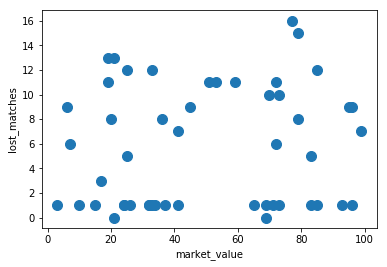

In [73]:
teams_pd.plot.scatter(x="market_value", y="lost_matches", s=100)

In [74]:
del teams_pd["name"]
teams_pd

,lost_matches,market_value
0,1,65
1,11,59
2,0,69
3,5,25
4,1,34
5,11,72
6,5,83
7,7,41
8,1,3
9,8,36


In [75]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 0.20640549,  2.26785223],
       [ 2.27046043,  2.05851203],
       [ 0.        ,  2.40741237],
       [ 1.03202747,  0.87225086],
       [ 0.20640549,  1.18626117],
       [ 2.27046043,  2.51208247],
       [ 1.03202747,  2.89587285],
       [ 1.44483845,  1.43049141],
       [ 0.20640549,  0.1046701 ],
       [ 1.65124395,  1.25604124],
       [ 0.20640549,  1.29093127],
       [ 2.06405493,  2.54697251],
       [ 0.20640549,  0.52335052],
       [ 1.85764944,  3.3494433 ],
       [ 0.20640549,  1.1164811 ],
       [ 1.23843296,  0.24423024],
       [ 0.20640549,  0.90714089],
       [ 2.68327141,  0.66291065],
       [ 0.20640549,  2.54697251],
       [ 3.30248789,  2.68653265],
       [ 0.20640549,  1.15137113],
       [ 2.68327141,  0.73269072],
       [ 0.20640549,  2.89587285],
       [ 0.61921648,  0.59313058],
       [ 1.44483845,  3.4541134 ],
       [ 1.23843296,  2.51208247],
       [ 2.27046043,  0.66291065],
       [ 2.47686592,  0.87225086],
       [ 0.20640549,

In [76]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 1.99033868,  0.99935027],
        [ 0.20640549,  1.59735679],
        [ 2.04817759,  2.7885189 ]]),
 array([1, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1,
        1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2,
        1, 0, 1, 2], dtype=int32))

In [77]:
colors_map = {0: 'r', 1: 'g', 2: 'b'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'b',
 'g',
 'r',
 'g',
 'b',
 'b',
 'r',
 'g',
 'r',
 'g',
 'b',
 'g',
 'b',
 'g',
 'r',
 'g',
 'r',
 'g',
 'b',
 'g',
 'r',
 'g',
 'g',
 'b',
 'b',
 'r',
 'r',
 'g',
 'r',
 'g',
 'r',
 'g',
 'b',
 'g',
 'r',
 'g',
 'r',
 'g',
 'r',
 'g',
 'b',
 'g',
 'b',
 'g',
 'b',
 'g',
 'r',
 'g',
 'b']

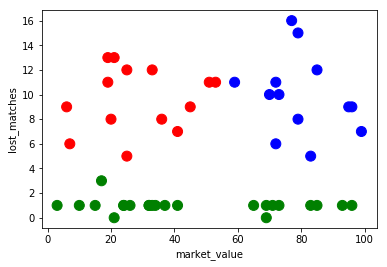

In [78]:
teams_pd.plot.scatter(x="market_value", y="lost_matches", c=colors, s=100)

In [79]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 2.02652666,  0.86273539],
        [ 0.27520732,  0.86992486],
        [ 2.45393197,  2.39965903],
        [ 0.18347155,  2.72917602],
        [ 1.51364028,  3.047063  ]]),
 array([3, 2, 3, 1, 1, 2, 4, 0, 1, 0, 1, 2, 1, 4, 1, 0, 1, 0, 3, 2, 1, 0, 3,
        1, 4, 4, 0, 0, 1, 2, 3, 2, 1, 2, 3, 0, 1, 0, 1, 0, 3, 4, 3, 2, 1, 4,
        3, 0, 1, 2], dtype=int32))

In [80]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['y',
 'b',
 'y',
 'g',
 'g',
 'b',
 'm',
 'r',
 'g',
 'r',
 'g',
 'b',
 'g',
 'm',
 'g',
 'r',
 'g',
 'r',
 'y',
 'b',
 'g',
 'r',
 'y',
 'g',
 'm',
 'm',
 'r',
 'r',
 'g',
 'b',
 'y',
 'b',
 'g',
 'b',
 'y',
 'r',
 'g',
 'r',
 'g',
 'r',
 'y',
 'm',
 'y',
 'b',
 'g',
 'm',
 'y',
 'r',
 'g',
 'b']

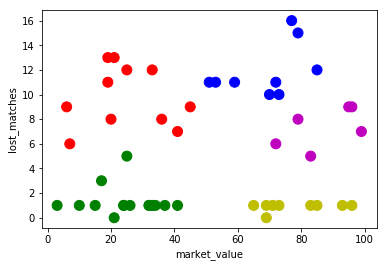

In [81]:
teams_pd.plot.scatter(x="market_value", y="lost_matches", c=colors, s=100)